In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
air_data = pd.read_excel('AirQualityUCI.xlsx')
air_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [4]:

air_data.shape

(9357, 15)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


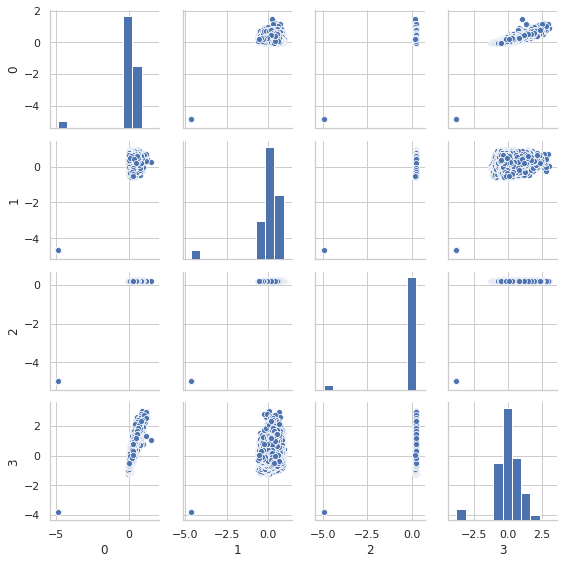

In [5]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
sns.set(style='whitegrid', context='notebook')
features_plot = ['C6H6(GT)', 'RH', 'AH', 'PT08.S1(CO)']

data_to_plot = air_data[features_plot]
data_to_plot = scalar.fit_transform(data_to_plot)
data_to_plot = pd.DataFrame(data_to_plot)

sns.pairplot(data_to_plot, size=2.0);
plt.tight_layout()
plt.show()

# Step 1. Preprocessing data

In [6]:
air_data.dropna(axis=0, how='all')

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


# **Step 2. Features vs Labels**

In [0]:
features = air_data

In [0]:
features = features.drop('Date', axis=1)
features = features.drop('Time', axis=1)
features = features.drop('C6H6(GT)', axis=1)
features = features.drop('PT08.S4(NO2)', axis=1)

In [0]:
labels = air_data['C6H6(GT)'].values

In [0]:
features = features.values

# **Step 3. Train and test portions**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=1)

In [13]:
print("X_trian shape --> {}".format(X_train.shape))
print("y_train shape --> {}".format(y_train.shape))
print("X_test shape --> {}".format(X_test.shape))
print("y_test shape --> {}".format(y_test.shape))

X_trian shape --> (6549, 11)
y_train shape --> (6549,)
X_test shape --> (2808, 11)
y_test shape --> (2808,)


# **Step 4. Regression**

## **Step 4.1 Linear Regression**

In [0]:
from sklearn.linear_model import LinearRegression

In [15]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print("Predicted values:", regressor.predict(X_test))
y_pred=regressor.predict(X_test)
y_pred=y_pred.reshape((-1, 1))

Predicted values: [ 5.1811588  -1.16212254  6.22585335 ... 17.27733669 18.09304722
  9.86772244]


In [17]:
print("R^2 score for liner regression: ", regressor.score(X_test, y_test))

R^2 score for liner regression:  0.9991371797127734


In [18]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

1.4571943722667688

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_pred, y_test))
rmse

1.2071430620546881

In [20]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error( y_pred, y_test)

0.8060244440070082

## **Step 4.2 Support Vector Regression**

In [0]:
from sklearn.model_selection import KFold
from sklearn.svm import SVR

In [22]:
support_regressor = SVR(kernel='rbf', C=1000)
support_regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
print("Coefficient of determination R^2 <-- on train set: {}".format(support_regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9999940829589243


In [24]:
print("Coefficient of determination R^2 <-- on test set: {}".format(support_regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.25350575967365996


## **Step 4.3 Decision tree regression**

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [27]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtr.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [28]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtr.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.9999412806123987


## **Step 4.4 Lasso regression**

In [0]:
from sklearn.linear_model import Lasso

In [30]:
indiana_jones = Lasso(alpha=1.0)
indiana_jones.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [31]:
print("Coefficient of determination R^2 <-- on train set : {}".format(indiana_jones.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set : 0.9991959081600441


In [32]:
print("Coefficient of determination R^2 <-- on test set: {}".format(indiana_jones.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.9990372767272155


## **Step 5. Feature selection**

In [0]:
from sklearn.ensemble import ExtraTreesRegressor

In [34]:
etr = ExtraTreesRegressor(n_estimators=300)
etr.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [35]:
print(etr.feature_importances_)
indecis = np.argsort(etr.feature_importances_)[::-1]

[1.01623726e-04 8.93719503e-02 2.53215348e-06 8.92119448e-02
 2.87072600e-04 5.00026448e-02 3.79943984e-05 5.66603096e-02
 2.29515329e-01 1.68081611e-01 3.16726988e-01]


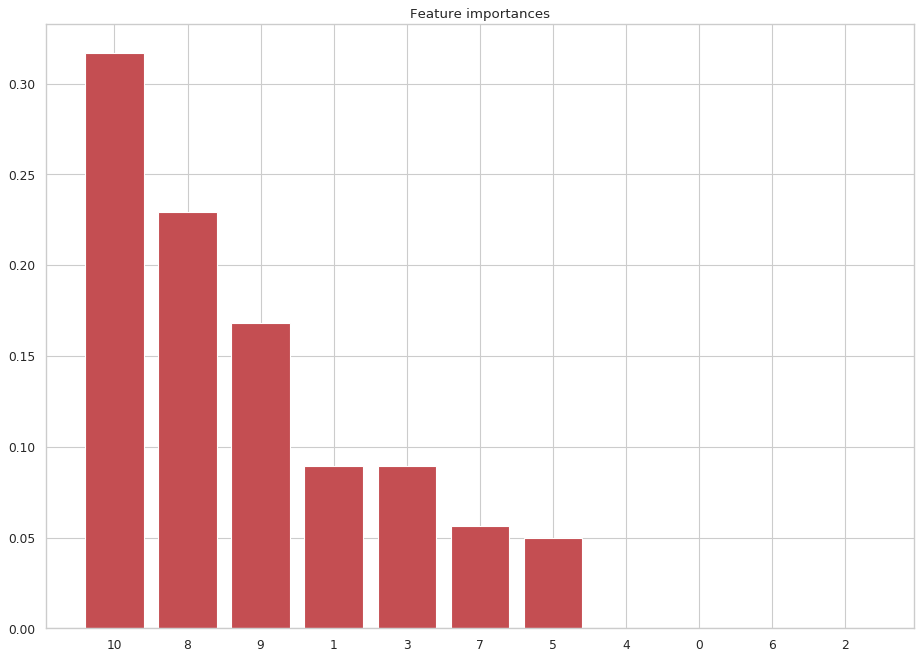

In [36]:
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w')
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), etr.feature_importances_[indecis],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), indecis)
plt.show()

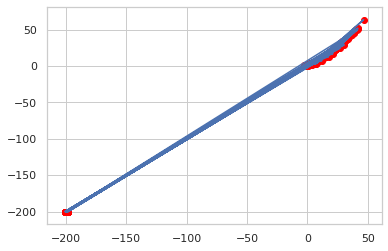

In [37]:
plt.plot(y_pred, y_test)   
plt.scatter(y_pred,y_test,c='red')